In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import evaluate as ev
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.options.display.float_format = '{:20,.4f}'.format

In [2]:
df = w.wrangle_zillow()

In [3]:
df.shape

(71525, 23)

In [4]:
list(df.columns)

['parcelid',
 'bathrooms',
 'bedrooms',
 'property_sqft',
 'latitude',
 'longitude',
 'lot_sqft',
 'prop_cnty_land_code',
 'prop_land_type_id',
 'census_tract_and_block',
 'region_id_county',
 'unitcnt',
 'year_built',
 'struct_tax_value',
 'tax_value',
 'assessment_year',
 'land_tax_value',
 'tax_amount',
 'log_error',
 'transaction_date',
 'orange_cnty',
 'ventura_cnty',
 'log_error_class']

In [8]:
binary_vars = ['orange_cnty','ventura_cnty']
categorical_vars = ['prop_land_type_id','region_id_county']
quant_vars = [ 'bathrooms', 'bedrooms', 'property_sqft', 'latitude', 'longitude', 'lot_sqft', 'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'log_error']
categorical_target = ['log_error_class']
continuous_target = ['log_error']

In [6]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [9]:
train, validate, test = w.scale_my_data(train, validate, test, quant_vars)

In [10]:
train.shape, validate.shape, test.shape

((40054, 23), (17166, 23), (14305, 23))

In [11]:
train.head()

,parcelid,bathrooms,bedrooms,property_sqft,latitude,longitude,lot_sqft,prop_cnty_land_code,prop_land_type_id,census_tract_and_block,...,struct_tax_value,tax_value,assessment_year,land_tax_value,tax_amount,log_error,transaction_date,orange_cnty,ventura_cnty,log_error_class
62705,14430704,1.2864,0.9697,2.1583,-1.9243,1.3276,-0.1926,122,261,"60,590,423.2320",...,2.0287,1.8995,"2,016.0000",1.6115,1.7246,0.1043,2017-05-19,1,0,s3
63921,14474916,0.2361,0.9697,0.7858,-1.4957,1.4846,-0.1578,122,261,"60,590,320.0320",...,0.0485,-0.1432,"2,016.0000",-0.2222,-0.2570,-0.1762,2017-07-17,1,0,s2
50708,13843803,-1.3394,-0.0211,-0.6856,-1.0100,0.8678,-0.1829,122,261,"60,590,747.0220",...,-0.6313,-0.1196,"2,016.0000",0.1505,-0.1355,0.0664,2017-08-24,1,0,s3
30838,12115143,-0.2891,-1.0119,-0.6782,0.5597,0.2071,-0.1240,010C,266,"60,374,623.0140",...,0.4376,0.0308,"2,016.0000",-0.1764,-0.0143,-0.6398,2017-04-17,0,0,s1
68001,14672371,-0.2891,-0.0211,-0.5707,-1.0660,0.4135,-0.2324,34,266,"60,590,994.1610",...,-0.4529,-0.1599,"2,016.0000",0.0054,-0.2060,-0.1663,2017-08-25,1,0,s2


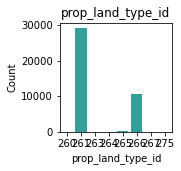

     prop_land_type_id  Count              Percent
261                261  29175              72.8400
266                266  10612              26.4900
265                265    189               0.4700
263                263     31               0.0800
267                275     21               0.0500
275                267     17               0.0400
260                264      7               0.0200
264                260      2               0.0000
_________________________________________________________________


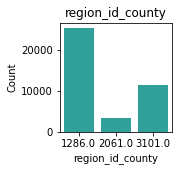

               region_id_county  Count              Percent
3,101.0000           1,286.0000  25284              63.1200
1,286.0000           3,101.0000  11372              28.3900
2,061.0000           2,061.0000   3398               8.4800
_________________________________________________________________


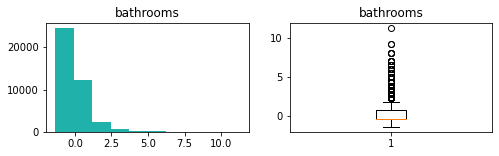

count            40,054.0000
mean                  0.0000
std                   1.0000
min                  -1.3394
25%                  -0.2891
50%                  -0.2891
75%                   0.7613
max                  11.2646
Name: bathrooms, dtype: float64


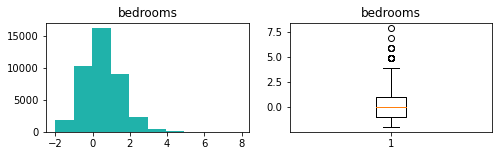

count            40,054.0000
mean                  0.0000
std                   1.0000
min                  -2.0027
25%                  -1.0119
50%                  -0.0211
75%                   0.9697
max                   7.9053
Name: bedrooms, dtype: float64


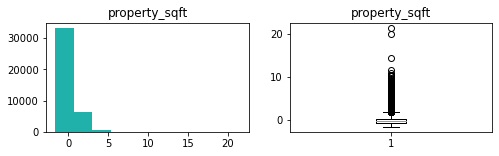

count            40,054.0000
mean                 -0.0000
std                   1.0000
min                  -1.6123
25%                  -0.6293
50%                  -0.2579
75%                   0.3326
max                  21.4616
Name: property_sqft, dtype: float64


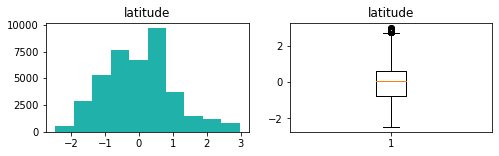

count            40,054.0000
mean                  0.0000
std                   1.0000
min                  -2.4659
25%                  -0.7443
50%                   0.0517
75%                   0.6366
max                   2.9762
Name: latitude, dtype: float64


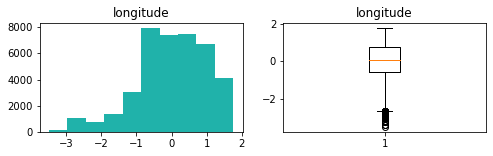

count            40,054.0000
mean                  0.0000
std                   1.0000
min                  -3.4958
25%                  -0.6006
50%                   0.0798
75%                   0.7748
max                   1.7634
Name: longitude, dtype: float64


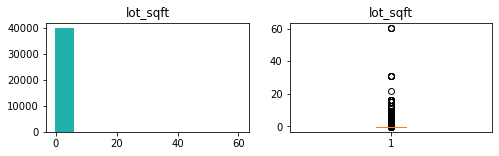

count            40,054.0000
mean                  0.0000
std                   1.0000
min                  -0.2423
25%                  -0.1977
50%                  -0.1837
75%                  -0.1476
max                  60.4410
Name: lot_sqft, dtype: float64


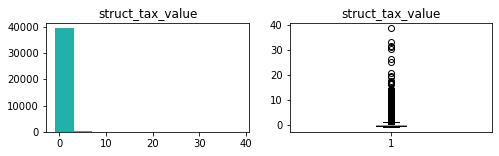

count            40,054.0000
mean                  0.0000
std                   1.0000
min                  -0.8119
25%                  -0.4549
50%                  -0.2331
75%                   0.1213
max                  38.6331
Name: struct_tax_value, dtype: float64


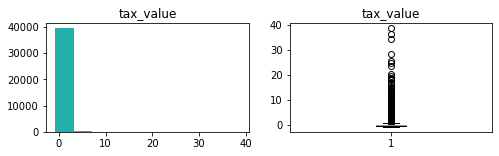

count            40,054.0000
mean                  0.0000
std                   1.0000
min                  -0.7563
25%                  -0.4453
50%                  -0.2085
75%                   0.1227
max                  38.7639
Name: tax_value, dtype: float64


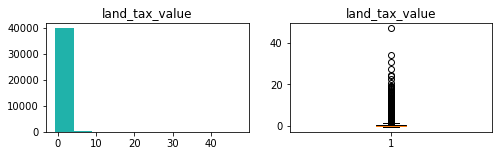

count            40,054.0000
mean                  0.0000
std                   1.0000
min                  -0.6461
25%                  -0.4699
50%                  -0.2110
75%                   0.1439
max                  47.4486
Name: land_tax_value, dtype: float64


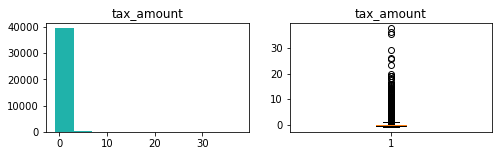

count            40,054.0000
mean                 -0.0000
std                   1.0000
min                  -0.7943
25%                  -0.4410
50%                  -0.2101
75%                   0.1198
max                  37.7972
Name: tax_amount, dtype: float64


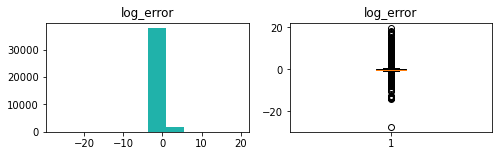

count            40,054.0000
mean                  0.0000
std                   1.0000
min                 -27.3226
25%                  -0.2426
50%                  -0.0642
75%                   0.1228
max                  19.7430
Name: log_error, dtype: float64


In [13]:
ex.explore_univariate(train, categorical_vars, quant_vars)

In [15]:
ex.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

orange_cnty 
_____________________



ValueError: Shape of passed values is (1, 2), indices imply (40054, 2)